In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
from scipy.stats import skew

In [8]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [9]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.shape

(1030, 9)

In [11]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [13]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [14]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
for col in df:
    print(col,"-",skew(df[col]))
    print("-----------------------------------------------")

cement - 0.5087389156389814
-----------------------------------------------
slag - 0.7995503309986295
-----------------------------------------------
flyash - 0.5365710347923704
-----------------------------------------------
water - 0.07451965817729818
-----------------------------------------------
superplasticizer - 0.9058808712519941
-----------------------------------------------
coarseaggregate - -0.040161148656697586
-----------------------------------------------
fineaggregate - -0.2526409879628952
-----------------------------------------------
age - 3.264414535416806
-----------------------------------------------
csMPa - 0.41636979411469355
-----------------------------------------------


In [16]:
for col in df:
    if skew(df[col]) >= 0.1 or skew(df[col]) <= -0.1 :
         if col != "csMPa":
                df[col] = np.sqrt(df[col])
                print(col,"-",skew(df[col]))
                print("-----------------------------------------------")

cement - 0.18991616838337638
-----------------------------------------------
slag - 0.2565040942714154
-----------------------------------------------
flyash - 0.3075340541786885
-----------------------------------------------
superplasticizer - -0.16061096291847152
-----------------------------------------------
fineaggregate - -0.39624486344413434
-----------------------------------------------
age - 1.5620903798906929
-----------------------------------------------


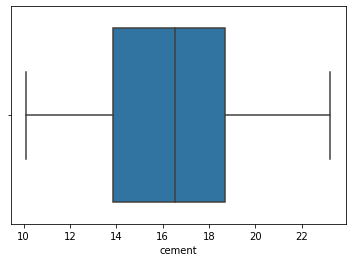

cement
-----------------------------------------------


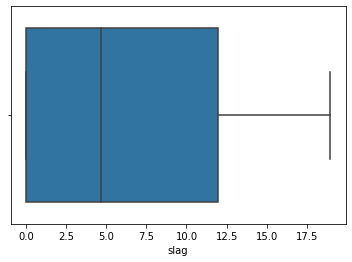

slag
-----------------------------------------------


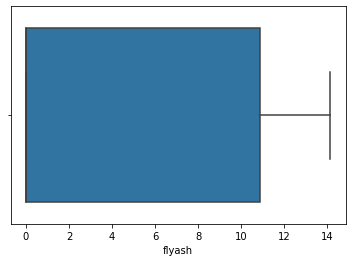

flyash
-----------------------------------------------


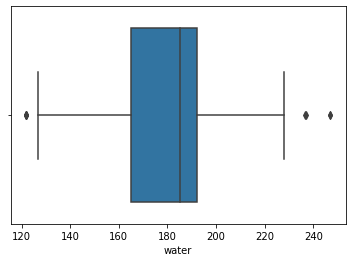

water
-----------------------------------------------


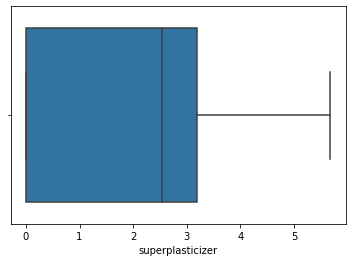

superplasticizer
-----------------------------------------------


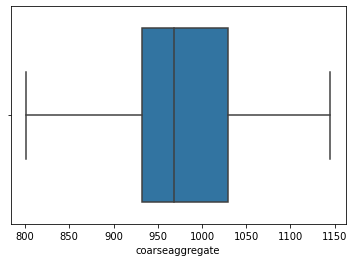

coarseaggregate
-----------------------------------------------


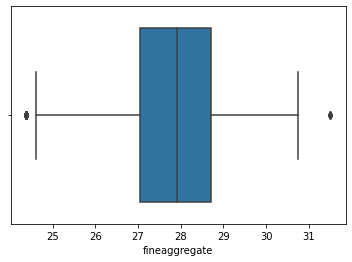

fineaggregate
-----------------------------------------------


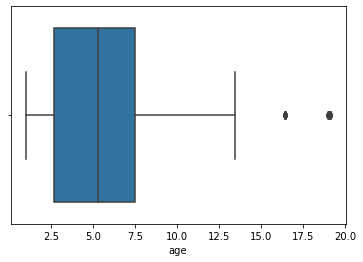

age
-----------------------------------------------


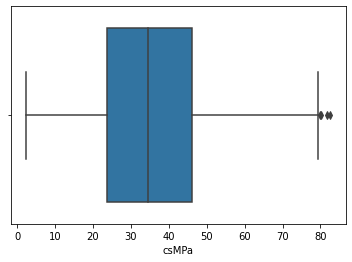

csMPa
-----------------------------------------------


In [17]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

In [18]:
s=df['water']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [19]:
len(outliers1)

9

In [20]:
a=list(outliers1.keys())
df.drop(a,inplace=True)

In [21]:
s=df['fineaggregate']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [22]:
len(outliers2)

40

In [23]:
b=list(outliers2.keys())
df.drop(b,inplace=True)

In [24]:
s=df['age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [25]:
len(outliers3)      

23

In [26]:
c=list(outliers3.keys())
df.drop(c,inplace=True)

In [27]:
df.shape

(958, 9)

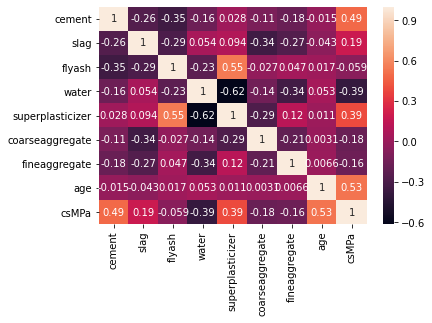

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
X=df.drop('csMPa',axis=1)
Y=df['csMPa']

In [30]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,23.237900,0.000000,0.0,162.0,1.581139,1040.0,26.000000,5.291503
1,23.237900,0.000000,0.0,162.0,1.581139,1055.0,26.000000,5.291503
5,16.309506,10.677078,0.0,228.0,0.000000,932.0,25.884358,9.486833
8,16.309506,10.677078,0.0,228.0,0.000000,932.0,25.884358,5.291503
10,14.092551,11.506520,0.0,192.0,0.000000,978.4,28.731516,9.486833


In [31]:
Y.head()

0     79.99
1     61.89
5     47.03
8     45.85
10    38.07
Name: csMPa, dtype: float64

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
ss=StandardScaler()

In [34]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [35]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1,input_shape=(X.shape[1],))
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='sgd',loss='mse')

In [38]:
trianed_model=model.fit(X_train_ss,Y_train,epochs=50,batch_size=16)

Epoch 1/50
42/42 [==============================] - 0s 6ms/step - loss: 788.1172
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 187.3349
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 81.0697
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 61.5278
Epoch 5/50
42/42 [==============================] - 0s 4ms/step - loss: 57.4718
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 56.4397
Epoch 7/50
42/42 [==============================] - 0s 4ms/step - loss: 56.0475
Epoch 8/50
42/42 [==============================] - 0s 4ms/step - loss: 55.7136
Epoch 9/50
42/42 [==============================] - 0s 4ms/step - loss: 55.5471
Epoch 10/50
42/42 [==============================] - 0s 4ms/step - loss: 55.3897
Epoch 11/50
42/42 [==============================] - 0s 4ms/step - loss: 55.3620
Epoch 12/50
42/42 [==============================] - 0s 4ms/step - loss: 55.2411
Epoch 13/50
42/42 [================

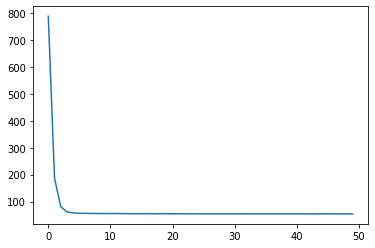

In [39]:
plt.plot(trianed_model.history['loss'])
plt.show()

In [40]:
Y_pred=model.predict(X_test_ss)

In [41]:
print(r2_score(Y_test,Y_pred))

0.8084646426451113
